# XGBoost model
A simple MLP contains only one hidden layer. We supply a data matrix to the input to have the same input as for the transformers. So we first need to flatten the matrix into a vector that can be run through the net.

This notebook presents the results achieved using the multi-step forecasting model.

In [1]:
import inference_helpers

import torch
from config import get_config

import numpy as np
from sklearn.metrics import mean_squared_error

In [2]:
from importlib import reload
reload(inference_helpers)

<module 'inference_helpers' from 'c:\\Users\\obhlivoj\\DP\\System-Imbalance-Forecasting\\models\\xgboost\\inference_helpers.py'>

In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)
cfg = get_config()

Using device: cuda


We present summary statistics on validation data. To measure error, it was used RMSE, MAE and R2 score. The error is computed for every prediction separately.

In [4]:
params = ('max_depth', 'reg_alpha', 'reg_lambda', 'subsamaple', 'learning_rate')

In [5]:
best_metrics, best_models_inds, data_dict = inference_helpers.get_best_model(cfg, './loss/runfinal_nfl_')
loss_validation, preds_gt = inference_helpers.validate_n_models(device, 'final_nfl_', params, eval_data="val")

MODEL EVAL - #1
--------------------
--------------------
MODEL EVAL - #2
--------------------
--------------------
MODEL EVAL - #3
--------------------
--------------------
MODEL EVAL - #4
--------------------
--------------------
MODEL EVAL - #5
--------------------
--------------------
MODEL EVAL - #6
--------------------
--------------------
MODEL EVAL - #7
--------------------
--------------------
MODEL EVAL - #8
--------------------
--------------------
Time-step	Error
1		13667.80
2		19627.20
3		22058.81
4		23414.90
5		25721.32
6		27010.88
7		27769.22
8		27922.56


In [7]:
## VALIDATION
res = inference_helpers.compute_val_errors(preds_gt, 8)

Model	RMSE	MAPE	MAE	R2
1	116.91	2.78	86.67	0.55
2	140.10	2.92	103.06	0.35
3	148.52	2.90	109.18	0.27
4	153.02	2.82	112.22	0.23
5	160.38	2.84	116.98	0.15
6	164.35	2.64	119.56	0.11
7	166.64	2.54	120.74	0.09
8	167.10	2.44	120.92	0.08


In [8]:
loss_validation, preds_gt = inference_helpers.validate_n_models(device, 'final_nfl_', params, eval_data="test")

MODEL EVAL - #1
--------------------
--------------------
MODEL EVAL - #2
--------------------
--------------------
MODEL EVAL - #3
--------------------
--------------------
MODEL EVAL - #4
--------------------
--------------------
MODEL EVAL - #5
--------------------
--------------------
MODEL EVAL - #6
--------------------
--------------------
MODEL EVAL - #7
--------------------
--------------------
MODEL EVAL - #8
--------------------
--------------------
Time-step	Error
1		12178.27
2		18047.94
3		20839.77
4		22372.53
5		24162.44
6		25467.67
7		25864.61
8		25942.19


In [10]:
## TEST
res = inference_helpers.compute_val_errors(preds_gt, 8)

Model	RMSE	MAPE	MAE	R2
1	110.36	3.51	81.22	0.55
2	134.34	4.27	97.95	0.33
3	144.36	3.95	104.13	0.23
4	149.57	3.76	106.85	0.17
5	155.44	3.74	110.79	0.11
6	159.59	3.68	113.23	0.06
7	160.82	3.24	113.67	0.05
8	161.07	3.19	113.57	0.04


The visual results are shown in the following graphs. Plotted are the k best, worst and random predictions against the average RMSE over all prediction steps.

In [9]:
seq_data = inference_helpers.group_data(preds_gt)

rmse_data = np.empty(len(seq_data), dtype=np.float32)
for ind, dp in enumerate(seq_data):
    rmse_data[ind] = mean_squared_error(dp['true'], dp['pred'], squared=False)

# get k random, best and worst predictions
k = 3
min_loss_inds = np.argsort(rmse_data)[:k].tolist()
max_loss_inds = np.argsort(rmse_data)[-k:].tolist()
rand_inds = np.random.randint(0, len(rmse_data), size=k).tolist()

### Bad predictions

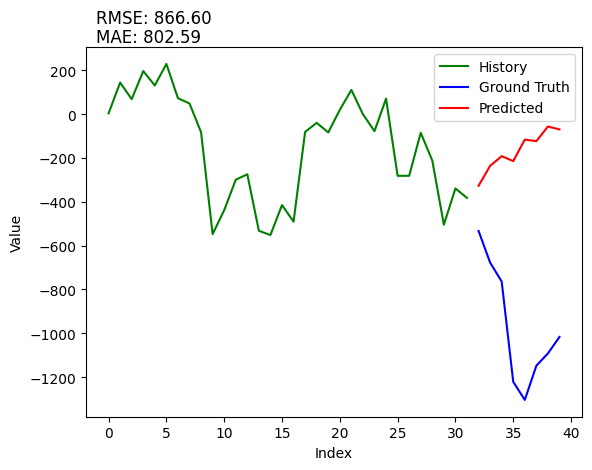

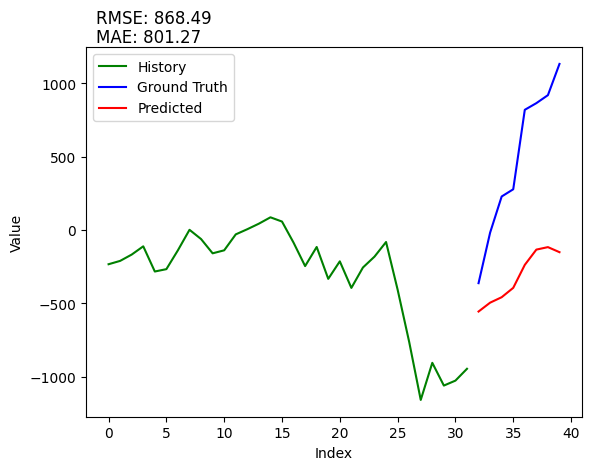

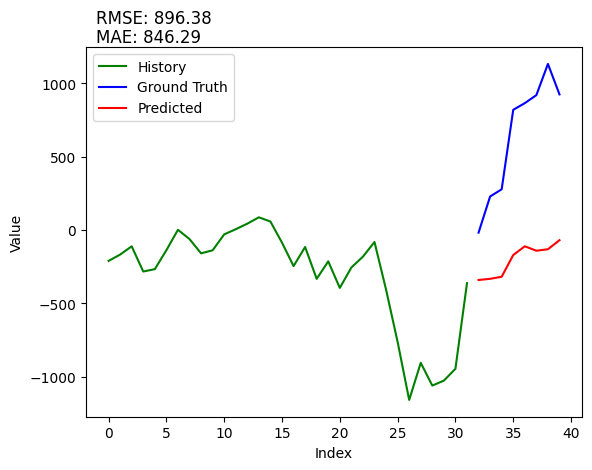

In [10]:
inference_helpers.plot_k_results(seq_data, max_loss_inds)

### Good predictions

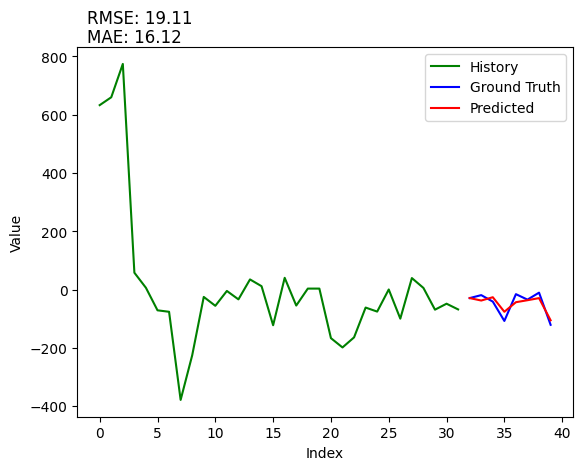

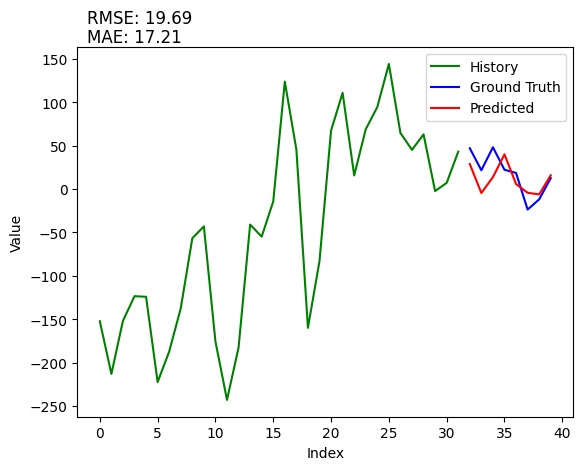

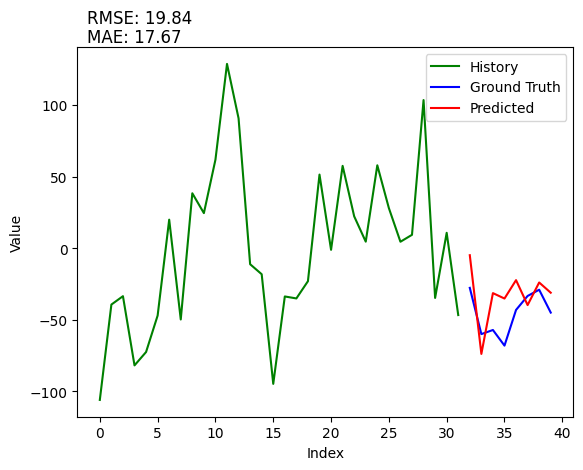

In [11]:
inference_helpers.plot_k_results(seq_data, min_loss_inds)

### Random predictions

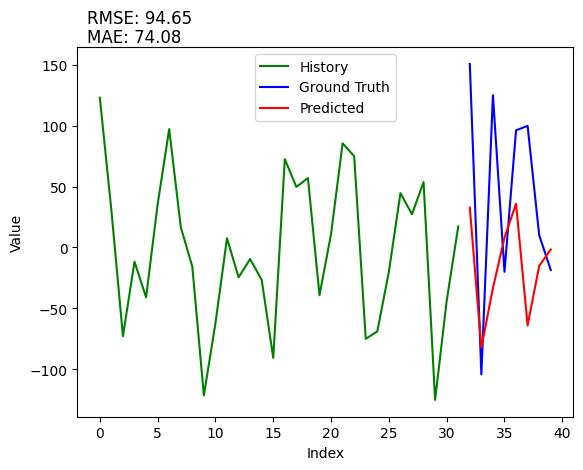

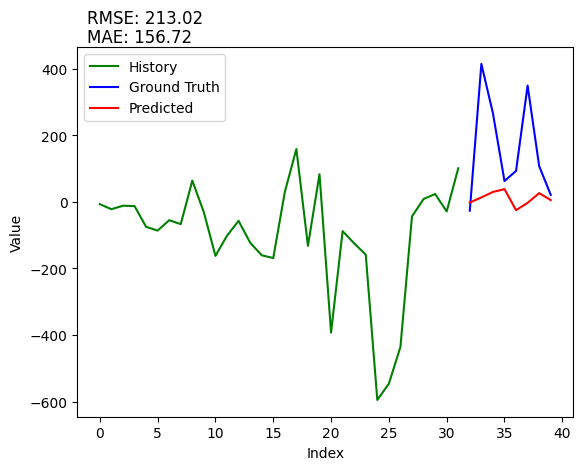

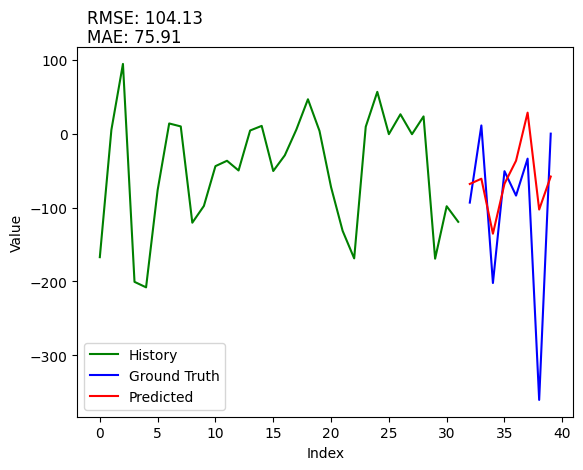

In [12]:
inference_helpers.plot_k_results(seq_data, rand_inds)